## **Enzyme Kinetics** : 

#### Our model: `E + S <-> ES` (with kinetic parameters _k1_forward_ and _k1_reverse_), and  `ES -> E + P`  (_k2_forward_)  

#### In experiment `enzyme_1_a`, we were given `k1_forward`, `k1_reverse` and `k2_forward`...  But what to do if we're **just given `kM` and `kcat`** ?  

In Part 1, we'll "cheat" and use the actual value of _k1_forward_  
In Part 2, we'll explore what happens if, lacking an actual value, we **under-estimate** _k1_forward_  
In Part 3, we'll explore what happens if we **over-estimate** _k1_forward_

Background: please see experiment `enzyme_1_a`

#### THE REACTION:  
the enzyme `Adenosinedeaminase` with the substrate `2,6-Diamino-9-β-D-deoxyribofuranosyl-9-H-purine`,  
and the initial concentration values choosen below, all satisfy the customary Michaelis-Menten assumptions that  
`[E] << [S]` and that the reaction rate constants satisfy `k1_reverse >> k2_forward`

Source of kinetic parameters:  *page 16 of "Analysis of Enzyme Reaction Kinetics, Vol. 1", by F. Xavier Malcata, Wiley, 2023*

### TAGS :  "uniform compartment", "chemistry", "numerical", "enzymes"

In [1]:
LAST_REVISED = "Dec. 15, 2024"
LIFE123_VERSION = "1.0-rc.1"        # Library version this experiment is based on

In [2]:
#import set_path                    # Using MyBinder?  Uncomment this before running the next cell!

In [3]:
#import sys
#sys.path.append("C:/some_path/my_env_or_install")   # CHANGE to the folder containing your venv or libraries installation!
# NOTE: If any of the imports below can't find a module, uncomment the lines above, or try:  import set_path   

from life123 import check_version, ChemData, Reactions, UniformCompartment, ReactionEnz, PlotlyHelper

In [4]:
check_version(LIFE123_VERSION)

OK


## Assume we're only given values for `kM` and `kcat`

In [5]:
# The following values are taken from experiment `enzyme_1`
kM = 8.27777777777777
kcat = 49

What values of k1_forward, k1_reverse and k2_forward are compatible with them?  
That question was explored in experiment `enzyme2_a`.  Here we'll explore the dynamic consequences of selecting various combinations of values.

## In the scenario we're exploring, there's LITTLE ENZYME relative to initial substrate concentration

In [6]:
S0 = 20.
E0 = 1.

# 1. Using the known, exact values for `k1_forward` and `k1_reverse`  

Source: *page 16 of "Analysis of Enzyme Reaction Kinetics, Vol. 1", by F. Xavier Malcata, Wiley, 2023*

In [7]:
k1_forward = 18.
k1_reverse = 100.

In [8]:
chem_data = ChemData(names=["P", "ES"], plot_colors=["green", "red"])

In [9]:
# Our Enzyme
chem_data.add_chemical(name="Adenosinedeaminase", label="E", plot_color="violet") 

# Our Substrate
chem_data.add_chemical(name="2,6-Diamino-9-β-D-deoxyribofuranosyl-9-H-purine", label="S", plot_color="darkturquoise")

chem_data.all_chemicals()

name label     plot_color
0                                                P     P          green
1                                               ES    ES            red
2                               Adenosinedeaminase     E         violet
3  2,6-Diamino-9-β-D-deoxyribofuranosyl-9-H-purine     S  darkturquoise

### Specify the Kinetic Parameters

In [10]:
rxns = Reactions(chem_data=chem_data)

In [11]:
# Elementary Reaction E + S <-> ES
rxns.add_reaction(reactants=["E", "S"], products=["ES"],
                  forward_rate=k1_forward, reverse_rate=k1_reverse) 

# Elementary Reaction ES <-> E + P 
rxns.add_reaction(reactants=["ES"], products=["E", "P"],
                  forward_rate=kcat, reverse_rate=0)

rxns.describe_reactions()

Number of reactions: 2 (at temp. 25 C)
0: E + S <-> ES  (kF = 18 / kR = 100 / delta_G = 4,250.9 / K = 0.18) | 1st order in all reactants & products
1: ES <-> E + P  (kF = 49 / kR = 0) | 1st order in all reactants & products
Set of chemicals involved in the above reactions: {"ES" (red), "E" (violet), "S" (darkturquoise), "P" (green)}


In [12]:
# Here we use the "slower" preset for the variable steps, a conservative option prioritizing accuracy over speed
uc = UniformCompartment(reactions=rxns, preset="slower")

uc.set_conc(conc={"S": S0, "E": E0})      # Small ampount of enzyme `E`, relative to substrate `S`
uc.describe_state()

SYSTEM STATE at Time t = 0:
4 species:
  Species 0 (P). Conc: 0.0
  Species 1 (ES). Conc: 0.0
  Species 2 (E). Conc: 1.0
  Species 3 (S). Conc: 20.0
Set of chemicals involved in reactions: {'ES', 'E', 'S', 'P'}


In [13]:
# Perform the reactions
uc.single_compartment_react(duration=1.2, initial_step=0.05)

784 total variable step(s) taken in 0.02 min
Number of step re-do's because of negative concentrations: 2
Number of step re-do's because of elective soft aborts: 1
Norm usage: {'norm_A': 706, 'norm_B': 710, 'norm_C': 706, 'norm_D': 706}
System Time is now: 1.2018


In [14]:
history_exact = uc.get_history()    # Let's save the historical data for a comparison at the very end

plot_pandas() NOTICE: Excessive number of vertical lines (785) - only showing 1 every 6 lines


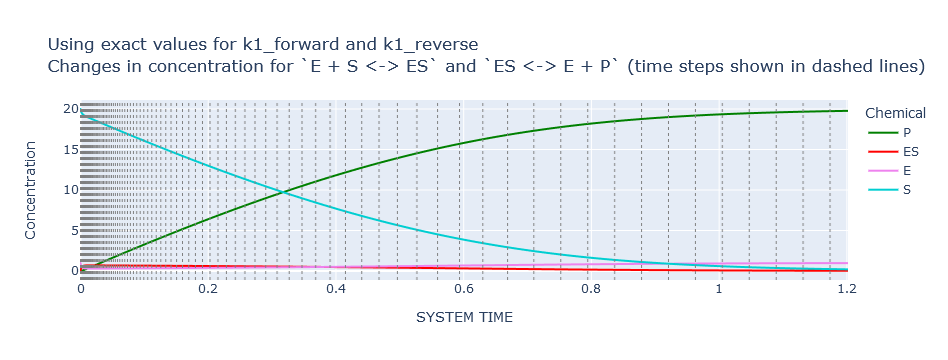

In [15]:
uc.plot_history(show_intervals=True, 
                title_prefix="Using exact values for k1_forward and k1_reverse")

### What is the initial rate of production of the final reaction product `P`?   
One could take the numerical derivative (gradient) of the time values of [P] - but no need to!  **Reaction rates are computed in the course of the simulation, and stored in a rate-history dataframe**

In [16]:
rates_exact = uc.get_rate_history()
rates_exact

SYSTEM TIME   rxn0_rate  rxn1_rate
0       0.000000  360.000000   0.000000
1       0.000500  274.543200   8.820000
2       0.000750  243.269275  12.075109
3       0.000763  241.911753  12.216716
4       0.000769  241.237493  12.287060
..           ...         ...        ...
779     1.166644    1.308959   1.462999
780     1.173671    1.261193   1.409959
781     1.180698    1.215086   1.358736
782     1.187725    1.170584   1.309274
783     1.194752    1.127638   1.261520

[784 rows x 3 columns]

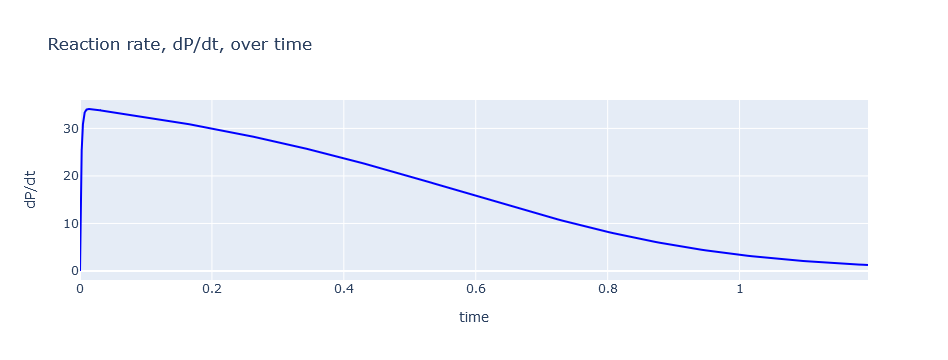

In [17]:
# Let's take a look at how the reaction rate varies with time
PlotlyHelper.plot_pandas(df=rates_exact, colors="blue",
                         title="Reaction rate, dP/dt, over time",
                         x_var="SYSTEM TIME", fields="rxn1_rate", 
                         x_label="time", y_label="dP/dt")

# 2. Guessing a SMALLER value of `k1_forward` (UNDER-ESTIMATED)

In [18]:
enz = ReactionEnz()

In [19]:
enz.min_k1_forward(kM=kM, kcat=kcat)   # The smallest possible value

5.919463087248328

In [20]:
k1_forward = 6.5    # Close to the smallest possible value

In [21]:
k1_reverse = enz.compute_k1_reverse(kM, kcat, k1_forward=k1_forward)
k1_reverse

4.8055555555555

In [22]:
chem_data.all_chemicals()   # Nothing changed here; same chemicals as before

name label     plot_color
0                                                P     P          green
1                                               ES    ES            red
2                               Adenosinedeaminase     E         violet
3  2,6-Diamino-9-β-D-deoxyribofuranosyl-9-H-purine     S  darkturquoise

In [23]:
rxns_underest = Reactions(chem_data=chem_data)   # New set of reactions

In [24]:
# Reaction E + S <-> ES , with 1st-order kinetics, 
# and a forward rate that is much faster than its revers one
rxns_underest.add_reaction(reactants=["E", "S"], products=["ES"],
                           forward_rate=k1_forward, reverse_rate=k1_reverse) 

# Reaction ES <-> E + P , with 1st-order kinetics
rxns_underest.add_reaction(reactants=["ES"], products=["E", "P"],
                           forward_rate=kcat, reverse_rate=0)

rxns_underest.describe_reactions()

Number of reactions: 2 (at temp. 25 C)
0: E + S <-> ES  (kF = 6.5 / kR = 4.8056 / delta_G = -748.72 / K = 1.3526) | 1st order in all reactants & products
1: ES <-> E + P  (kF = 49 / kR = 0) | 1st order in all reactants & products
Set of chemicals involved in the above reactions: {"ES" (red), "E" (violet), "S" (darkturquoise), "P" (green)}


In [25]:
# Here we use the "slower" preset for the variable steps, a conservative option prioritizing accuracy over speed
uc = UniformCompartment(reactions=rxns_underest, preset="slower")

uc.set_conc(conc={"S": S0, "E": E0})      # Small ampount of enzyme `E`, relative to substrate `S`
uc.describe_state()

SYSTEM STATE at Time t = 0:
4 species:
  Species 0 (P). Conc: 0.0
  Species 1 (ES). Conc: 0.0
  Species 2 (E). Conc: 1.0
  Species 3 (S). Conc: 20.0
Set of chemicals involved in reactions: {'ES', 'E', 'S', 'P'}


In [26]:
# Perform the reactions
uc.single_compartment_react(duration=1.2, initial_step=0.05)

788 total variable step(s) taken in 0.03 min
Number of step re-do's because of negative concentrations: 1
Number of step re-do's because of elective soft aborts: 2
Norm usage: {'norm_A': 704, 'norm_B': 709, 'norm_C': 704, 'norm_D': 704}
System Time is now: 1.2057


In [27]:
history_underest = uc.get_history()    # Let's save the historical data for a comparison at the very end

plot_pandas() NOTICE: Excessive number of vertical lines (789) - only showing 1 every 6 lines


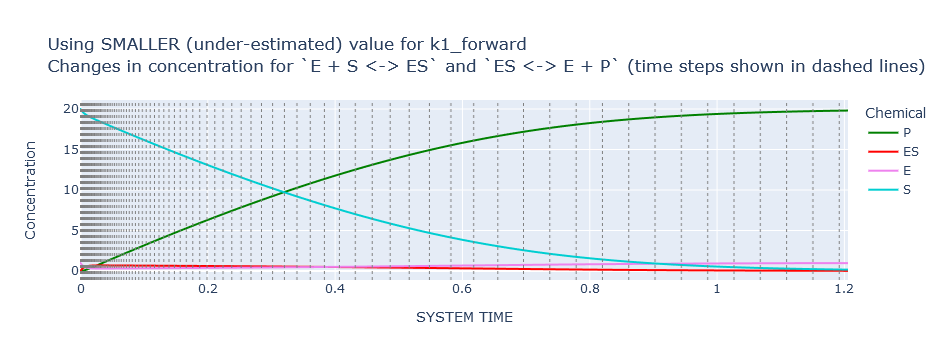

In [28]:
uc.plot_history(show_intervals=True, 
                title_prefix="Using SMALLER (under-estimated) value for k1_forward")

At first glance, not too different from before, overall, but let's take a closer look

In [29]:
rates_underest = uc.get_rate_history()
rates_underest

SYSTEM TIME   rxn0_rate  rxn1_rate
0       0.000000  130.000000   0.000000
1       0.000500  120.842601   3.185000
2       0.000750  116.711975   4.626306
3       0.000763  116.515396   4.694958
4       0.000769  116.417346   4.729203
..           ...         ...        ...
783     1.171227    1.169882   1.318201
784     1.178115    1.125129   1.268138
785     1.185004    1.082003   1.219867
786     1.191892    1.040450   1.173332
787     1.198781    1.000418   1.128479

[788 rows x 3 columns]

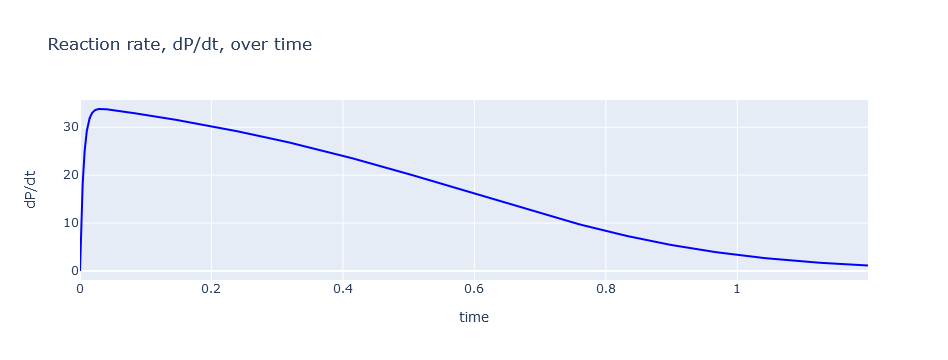

In [30]:
# Let's take a look at how the reaction rate varies with time
PlotlyHelper.plot_pandas(df=rates_underest, colors="blue",
                         title="Reaction rate, dP/dt, over time",
                         x_var="SYSTEM TIME", fields="rxn1_rate", 
                         x_label="time", y_label="dP/dt")

# 3. Guessing a LARGER value of `k1_forward` (OVER-ESTIMATED)

In [31]:
k1_forward = 40.    # Well above the known value of 18.

In [32]:
k1_reverse = enz.compute_k1_reverse(kM, kcat, k1_forward=k1_forward)
k1_reverse

282.1111111111108

In [33]:
chem_data.all_chemicals()   # Nothing changed here; same chemicals as before

name label     plot_color
0                                                P     P          green
1                                               ES    ES            red
2                               Adenosinedeaminase     E         violet
3  2,6-Diamino-9-β-D-deoxyribofuranosyl-9-H-purine     S  darkturquoise

In [34]:
rxns_overest = Reactions(chem_data=chem_data)   # New set of reactions

In [35]:
# Reaction E + S <-> ES , with 1st-order kinetics, 
# and a forward rate that is much faster than its revers one
rxns_overest.add_reaction(reactants=["E", "S"], products=["ES"],
                          forward_rate=k1_forward, reverse_rate=k1_reverse) 

# Reaction ES <-> E + P , with 1st-order kinetics
rxns_overest.add_reaction(reactants=["ES"], products=["E", "P"],
                          forward_rate=kcat, reverse_rate=0)

rxns_overest.describe_reactions()

Number of reactions: 2 (at temp. 25 C)
0: E + S <-> ES  (kF = 40 / kR = 282.11 / delta_G = 4,842.4 / K = 0.14179) | 1st order in all reactants & products
1: ES <-> E + P  (kF = 49 / kR = 0) | 1st order in all reactants & products
Set of chemicals involved in the above reactions: {"ES" (red), "E" (violet), "S" (darkturquoise), "P" (green)}


In [36]:
# Here we use the "slower" preset for the variable steps, a conservative option prioritizing accuracy over speed
uc = UniformCompartment(reactions=rxns_overest, preset="slower")

uc.set_conc(conc={"S": S0, "E": E0})      # Small ampount of enzyme `E`, relative to substrate `S`
uc.describe_state()

SYSTEM STATE at Time t = 0:
4 species:
  Species 0 (P). Conc: 0.0
  Species 1 (ES). Conc: 0.0
  Species 2 (E). Conc: 1.0
  Species 3 (S). Conc: 20.0
Set of chemicals involved in reactions: {'ES', 'E', 'S', 'P'}


In [37]:
# Perform the reactions
uc.single_compartment_react(duration=1.2, initial_step=0.05)

864 total variable step(s) taken in 0.03 min
Number of step re-do's because of negative concentrations: 2
Number of step re-do's because of elective soft aborts: 1
Norm usage: {'norm_A': 829, 'norm_B': 835, 'norm_C': 829, 'norm_D': 829}
System Time is now: 1.2001


In [38]:
history_overest = uc.get_history()    # Let's save the historical data for a comparison at the very end

plot_pandas() NOTICE: Excessive number of vertical lines (865) - only showing 1 every 6 lines


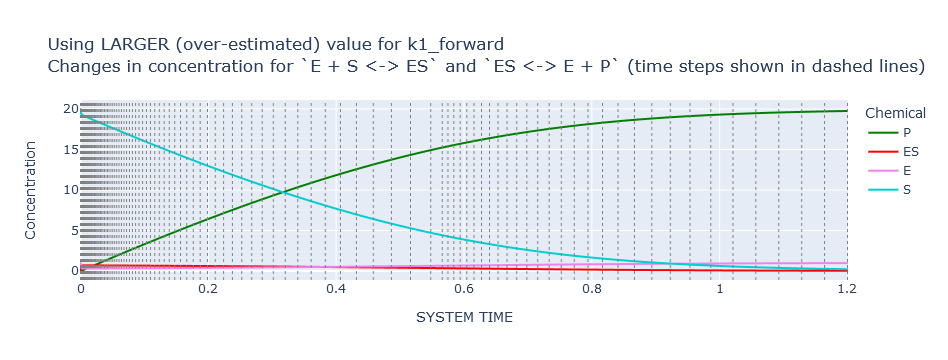

In [39]:
uc.plot_history(show_intervals=True, 
                title_prefix="Using LARGER (over-estimated) value for k1_forward")

At first glance, not too different from before, overall, but let's take a closer look

In [40]:
rates_overest = uc.get_rate_history()
rates_overest

SYSTEM TIME   rxn0_rate  rxn1_rate
0       0.000000  800.000000   0.000000
1       0.000500  357.555556  19.600000
2       0.000750  265.637774  23.739956
3       0.000763  262.356893  23.888118
4       0.000769  260.739940  23.961149
..           ...         ...        ...
859     1.170211    1.335790   1.490884
860     1.176184    1.296873   1.445487
861     1.182158    1.255105   1.401986
862     1.188131    1.219475   1.358993
863     1.194105    1.178798   1.318155

[864 rows x 3 columns]

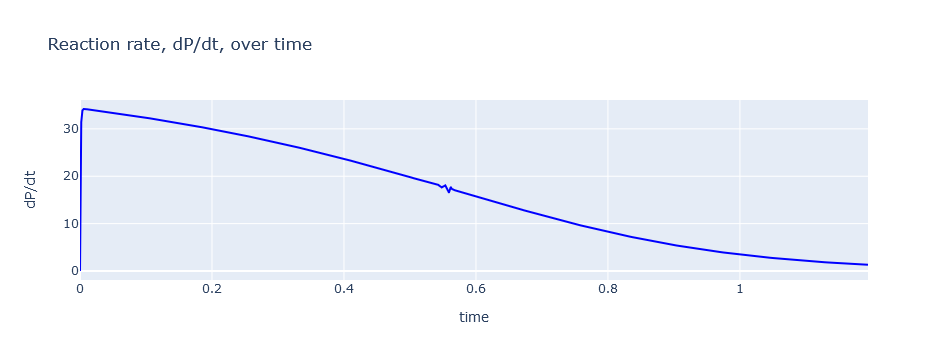

In [41]:
# Let's take a look at how the reaction rate varies with time
PlotlyHelper.plot_pandas(df=rates_overest, colors="blue",
                         title="Reaction rate, dP/dt, over time",
                         x_var="SYSTEM TIME", fields="rxn1_rate", 
                         x_label="time", y_label="dP/dt")

In [42]:
history_overest = uc.get_history()
history_overest

SYSTEM TIME          P        ES         E          S             caption
0       0.000000   0.000000  0.000000  1.000000  20.000000   Set concentration
1       0.000500   0.000000  0.400000  0.600000  19.600000   1st reaction step
2       0.000750   0.004900  0.484489  0.515511  19.510611                    
3       0.000763   0.005197  0.487513  0.512487  19.507291                    
4       0.000769   0.005346  0.489003  0.510997  19.505651                    
..           ...        ...       ...       ...        ...                 ...
860     1.176184  19.722714  0.029500  0.970500   0.247787                    
861     1.182158  19.731349  0.028612  0.971388   0.240039                    
862     1.188131  19.739724  0.027735  0.972265   0.232542                    
863     1.194105  19.747842  0.026901  0.973099   0.225257                    
864     1.200079  19.755716  0.026069  0.973931   0.218216  last reaction step

[865 rows x 6 columns]

# Comparing the 3 scenarios

#### The concentrations of the intermediate `ES` over time

In [43]:
es_under = PlotlyHelper.plot_pandas(df=history_underest, 
                         title="underestimated k1_forward",
                         x_var="SYSTEM TIME", fields="ES", 
                         x_label="time", y_label="ES", colors = "yellow")

In [44]:
es_exact = PlotlyHelper.plot_pandas(df=history_exact, 
                         title="exact k1_forward",
                         x_var="SYSTEM TIME", fields="ES", 
                         x_label="time", y_label="ES", colors = "green")

In [45]:
es_over = PlotlyHelper.plot_pandas(df=history_overest, 
                         title="overestimated k1_forward",
                         x_var="SYSTEM TIME", fields="ES", 
                         x_label="time", y_label="ES", colors = "purple")

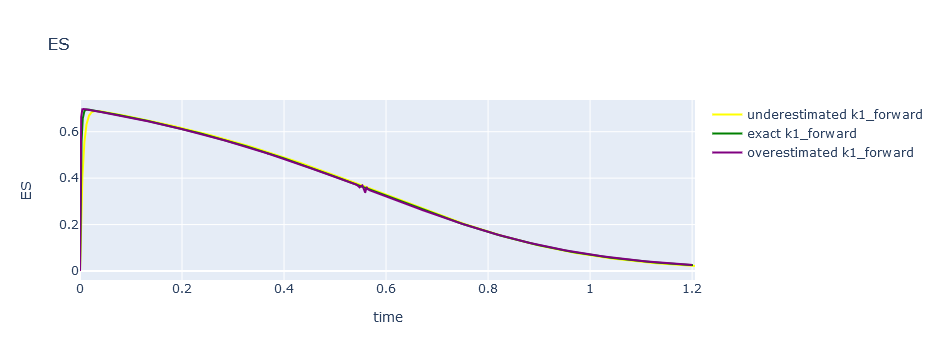

In [46]:
 PlotlyHelper.combine_plots([es_under, es_exact, es_over], 
                            title="ES")

#### The concentrations of the product `P` over time

In [47]:
p_under = PlotlyHelper.plot_pandas(df=history_underest, 
                         title="underestimated k1_forward",
                         x_var="SYSTEM TIME", fields="P", 
                         x_label="time", y_label="P", colors = "yellow")

In [48]:
p_exact = PlotlyHelper.plot_pandas(df=history_exact, 
                         title="exact k1_forward",
                         x_var="SYSTEM TIME", fields="P", 
                         x_label="time", y_label="P", colors = "cyan")

In [49]:
p_over = PlotlyHelper.plot_pandas(df=history_overest, 
                         title="overestimated k1_forward",
                         x_var="SYSTEM TIME", fields="P", 
                         x_label="time", y_label="P", colors = "purple")

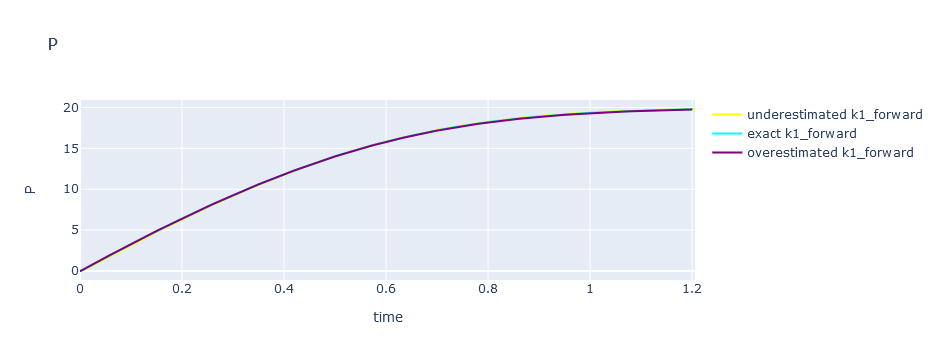

In [50]:
 PlotlyHelper.combine_plots([p_under, p_exact, p_over], 
                            title="P")

#### The Reaction Rate over time

In [51]:
r1_under = PlotlyHelper.plot_pandas(df=rates_underest, 
                         title="underestimated k1_forward",
                         x_var="SYSTEM TIME", fields="rxn1_rate", 
                         x_label="time", y_label="dP/dt", colors = "yellow")

In [52]:
r1_exact = PlotlyHelper.plot_pandas(df=rates_exact, 
                         title="exact k1_forward",
                         x_var="SYSTEM TIME", fields="rxn1_rate", 
                         x_label="time", y_label="dP/dt", colors = "blue")

In [53]:
r1_over = PlotlyHelper.plot_pandas(df=rates_overest, 
                         title="overestimated k1_forward",
                         x_var="SYSTEM TIME", fields="rxn1_rate", 
                         x_label="time", y_label="dP/dt", colors = "purple")

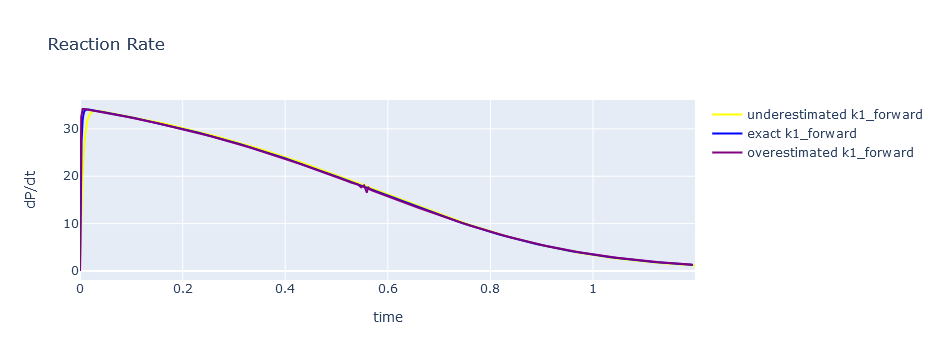

In [54]:
 PlotlyHelper.combine_plots([r1_under, r1_exact, r1_over], 
                            title="Reaction Rate")